# Telecom Churn Case Study

## Customers Churn Prediction

### Problem Statement

Build ML models to predict churn:
- Predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc
- Identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks. A good choice to identify important variables is a logistic regression model or a model from the tree family.
- Overall accuracy will be primary evaluation metric.
- Metrics like precision, recall, etc for different models should be calculated
- Build a ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Find which metric can be used in such scenarios.
- Recommend strategies to manage customer churn based on the observations.
- Try using a dimensionality reduction technique such as PCA and then build a predictive model.
- Use additional techniques like Class Imbalance handling, Boosting, etc to improve accuracy.    

### Data understanding, preparation and pre-processing

#### Importing important libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
import xgboost as xgb 

from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

#### Reading the datasets

Train dataset

In [2]:
train_df = pd.read_csv('train.csv')

Test dataset

In [3]:
test_df = pd.read_csv('test.csv')

Test Solution dataset

In [4]:
test_sol_df = pd.read_csv('solution.csv')

Getting a glimpse of the train dataset using .head() function

In [5]:
train_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

Getting a glimpse of the test dataset using .head() function

In [6]:
test_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

Getting a glimpse of the test solution dataset using .head() function

In [7]:
test_sol_df.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

Checking the shape of the train dataset

In [8]:
train_df.shape

(69999, 172)

Checking the shape of the test dataset

In [9]:
test_df.shape

(30000, 171)

Get basic information about dataset

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [11]:
train_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

Getting the sum of nulls in each column

In [12]:
train_df.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

Checking the data types of all columns

In [13]:
train_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

Columns which we have to impute as Zero as they should not be dropped based on missing values becuase they are important.

In [14]:
rech_cols = [x for x in train_df.columns if 'rech' in x and 'count' not in x and 'date' not in x and 'num' not in x]
train_df[rech_cols] = train_df[rech_cols].apply(lambda x: x.fillna(0))
test_df[rech_cols] = test_df[rech_cols].apply(lambda x: x.fillna(0))

#### Dropping rows for both train and test datasets where all values are null

In [15]:
train_df.dropna(axis=0, how='all', inplace=True)
test_df.dropna(axis=0, how='all', inplace=True)

In [16]:
print(train_df.shape)
print(test_df.shape)

(69999, 172)
(30000, 171)


Dropping columns for both train and test datasets
- Not needed columns like Id, last_date_of_month_6 etc.
- Columns having more than 70% values as null

In [17]:
# These columns do not matter as long as customer is doing a recharge.
cols_to_delete = ['id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                  'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
                  'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'
                 ]
train_df.drop(cols_to_delete, axis=1, inplace=True)
test_df.drop(cols_to_delete, axis=1, inplace=True)

Checking the % of null values in all columns having nulls greater than 70%

In [18]:
round((pd.isnull(train_df).sum()/len(train_df.index)),2)[pd.isnull(train_df).sum()/ len(train_df.index) > 0.70].sort_values()

arpu_3g_8           0.74
night_pck_user_8    0.74
night_pck_user_7    0.74
arpu_2g_8           0.74
arpu_2g_7           0.74
fb_user_7           0.74
arpu_3g_7           0.74
fb_user_8           0.74
count_rech_3g_8     0.74
count_rech_3g_7     0.74
count_rech_2g_8     0.74
count_rech_2g_7     0.74
arpu_2g_6           0.75
count_rech_3g_6     0.75
night_pck_user_6    0.75
fb_user_6           0.75
arpu_3g_6           0.75
count_rech_2g_6     0.75
dtype: float64

Count of missing data  > 70% columns in train dataset

In [19]:
len(round((pd.isnull(train_df).sum()/len(train_df.index)),2)[pd.isnull(train_df).sum()/ len(train_df.index) > 0.70].sort_values())

18

Count of missing data > 70% columns in test dataset

In [20]:
len(round((pd.isnull(test_df).sum()/len(test_df.index)),2)[pd.isnull(test_df).sum()/ len(test_df.index) > 0.70].sort_values())

18

#### As we have more than 70% data as null for 18 columns in train and test, we are dropping these columns from dataset.

In [21]:
cols_to_delete = ((pd.isnull(train_df).sum()/len(train_df.index))[pd.isnull(train_df).sum()/ len(train_df.index) > 0.70].sort_values()).keys()


In [22]:
cols_to_delete = cols_to_delete.to_list()
print(cols_to_delete)

['arpu_3g_8', 'night_pck_user_8', 'arpu_2g_8', 'count_rech_3g_8', 'fb_user_8', 'count_rech_2g_8', 'arpu_3g_7', 'fb_user_7', 'arpu_2g_7', 'night_pck_user_7', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_6']


In [23]:
train_df = train_df.drop(cols_to_delete, axis=1)

In [24]:
train_df.shape

(69999, 144)

In [25]:
test_df = test_df.drop(cols_to_delete, axis=1)

In [26]:
test_df.shape

(30000, 143)

#### Lets check the info of columns now

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 144 entries, circle_id to churn_probability
dtypes: float64(117), int64(27)
memory usage: 77.4 MB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Columns: 143 entries, circle_id to jun_vbc_3g
dtypes: float64(117), int64(26)
memory usage: 33.0 MB


#### We can see now we don't have any categorical data, all are numerical data only.

Imputing the na values with
- Median for numerical variables
- Mode for categorical variables

Creating a function to replace na values

In [29]:
def replace_nulls_fn(df, columns, data_type):
    for col in columns:
        if data_type == 'categorical':
            value = pd.to_datetime(df[col]).mode()
        else:
            value = df[col].median()
        df[col].fillna(value, inplace=True)
    return df

In [30]:
train_df = replace_nulls_fn(train_df, train_df.columns, 'numerical')
test_df = replace_nulls_fn(test_df, test_df.columns, 'numerical')

#### Lets check for unique entrie columns in train and test dataset

In [31]:
def cols_unique(df, df_columns, threshold=4):
    cols_delete = []
    for column in df_columns:
        if len(df[column].describe().unique()) < threshold:
            cols_delete.append(column)
    
    return cols_delete

In [32]:
print(train_df.shape)
print(test_df.shape)

(69999, 144)
(30000, 143)


In [33]:
# on train data
train_df = train_df.drop(cols_unique(train_df, train_df.columns), axis=1)
print(train_df.shape)

# on test data
test_df = test_df.drop(cols_unique(test_df, test_df.columns), axis=1)
print(test_df.shape)

(69999, 134)
(30000, 133)


#### Lets find the high value customers based on recharge done in 6th and 7th month and update dataframe

#### For train data

Total data recharge in 6th, 7th and 8th months

In [34]:
train_df["total_data_recharge_amnt_6"] = train_df.total_rech_data_6 * train_df.av_rech_amt_data_6
train_df["total_data_recharge_amnt_7"] = train_df.total_rech_data_7 * train_df.av_rech_amt_data_7
train_df["total_data_recharge_amnt_8"] = train_df.total_rech_data_8 * train_df.av_rech_amt_data_8

Total amount spent on recharge in 6th, 7th and 8th months

In [35]:
train_df["total_recharge_amnt_6"] = train_df.total_rech_amt_6 + train_df.total_data_recharge_amnt_6
train_df["total_recharge_amnt_7"] = train_df.total_rech_amt_7 + train_df.total_data_recharge_amnt_7
train_df["total_recharge_amnt_8"] = train_df.total_rech_amt_8 + train_df.total_data_recharge_amnt_8

Average recharge for 6th and 7th month

In [36]:
train_df['average_amnt_6_7'] = (train_df["total_recharge_amnt_6"] + train_df["total_recharge_amnt_7"])/2

70th percentile of average_amnt_6_7

In [37]:
train_df['average_amnt_6_7'].quantile(.70)

477.5

Lets compare customer behavior based on average_amnt_6_7 vs total_recharge_amnt_8

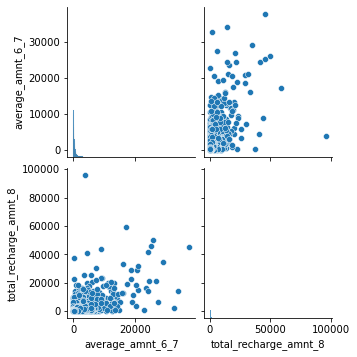

In [38]:
cols_to_compare = ['average_amnt_6_7', 'total_recharge_amnt_8']
sns.pairplot(train_df[cols_to_compare])
plt.show()

#### Filter dataset based on average_amnt_6_7 (70th percentile for train dataset is 477.5)

In [39]:
train_df = train_df[train_df["average_amnt_6_7"]>= train_df["average_amnt_6_7"].quantile(.70)]

In [40]:
train_df.shape

(21013, 141)

Lets remove not needed newly added features

In [41]:
train_df.drop(['total_data_recharge_amnt_6', 'total_data_recharge_amnt_7', 'total_data_recharge_amnt_8',
                        'total_recharge_amnt_6', 'total_recharge_amnt_7', 'total_recharge_amnt_8',
                        'average_amnt_6_7'], 
                      axis=1, inplace=True)

#### Correlation matrix

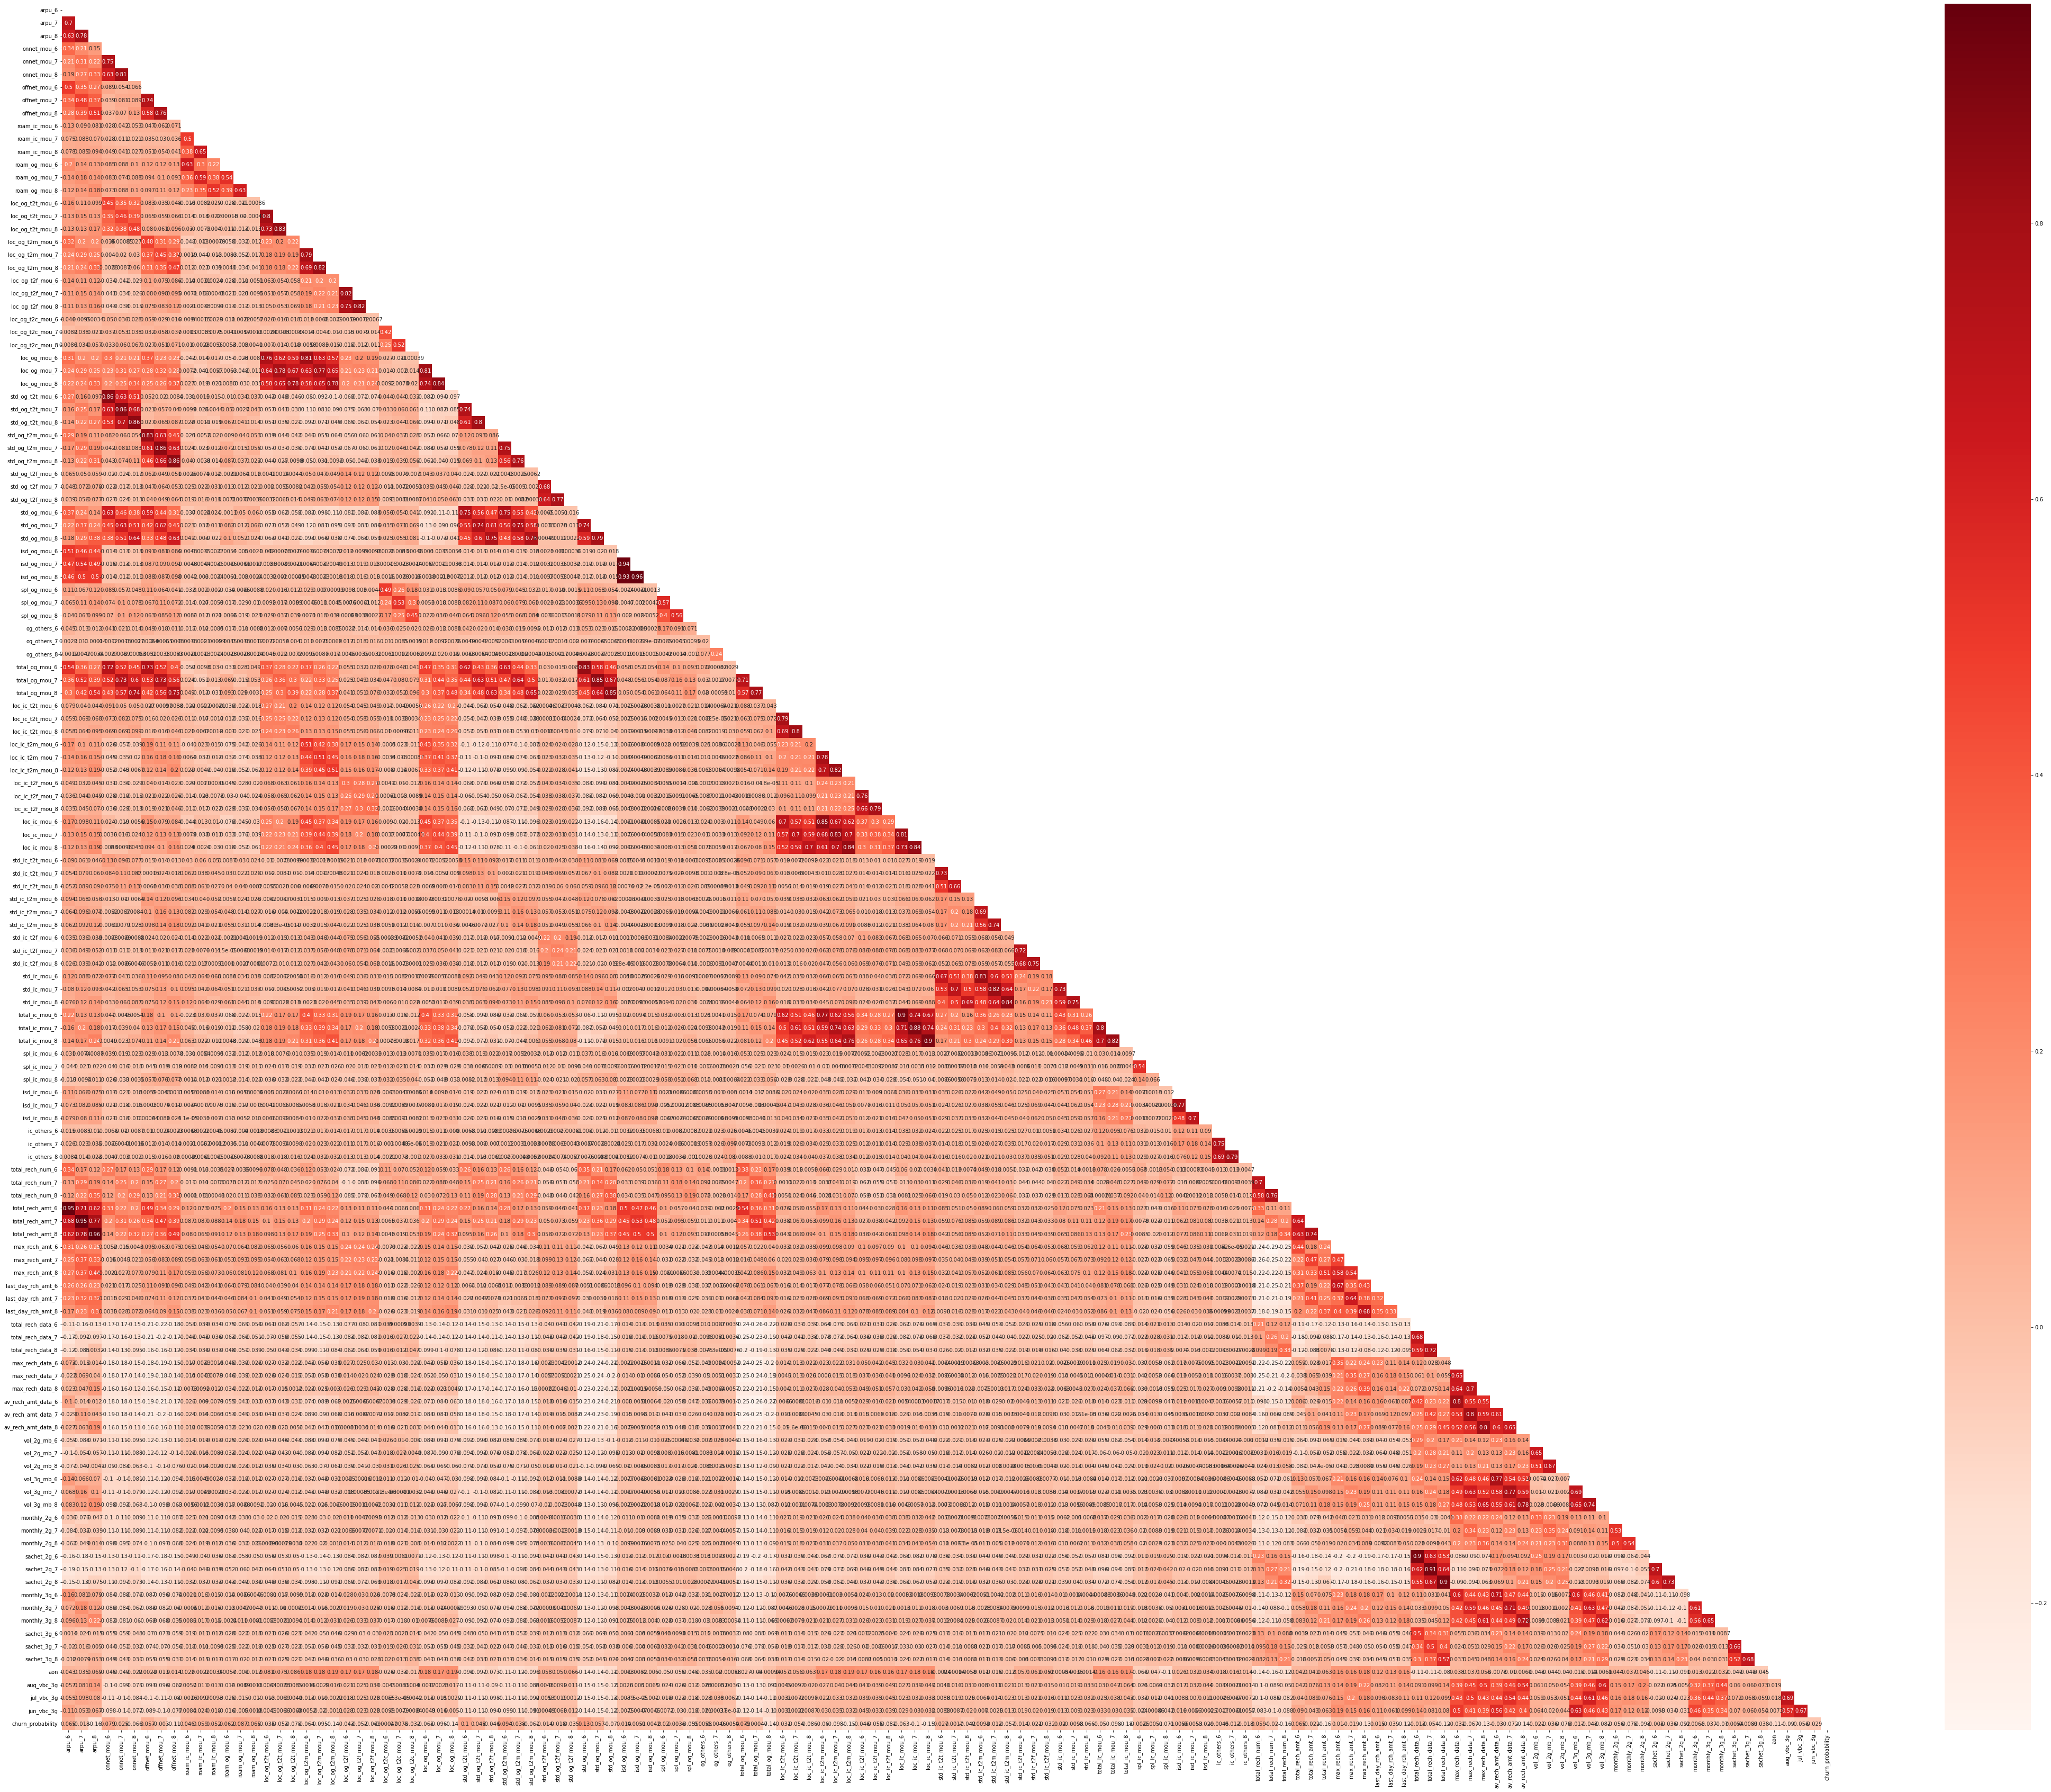

In [42]:
plt.figure(figsize = (75, 60))
matrix = np.triu(train_df.corr())
sns.heatmap(train_df.corr(), annot = True, cmap="Reds", mask=matrix)
plt.show()

Choosing 15 Variables for heatmap based on Churn Probability

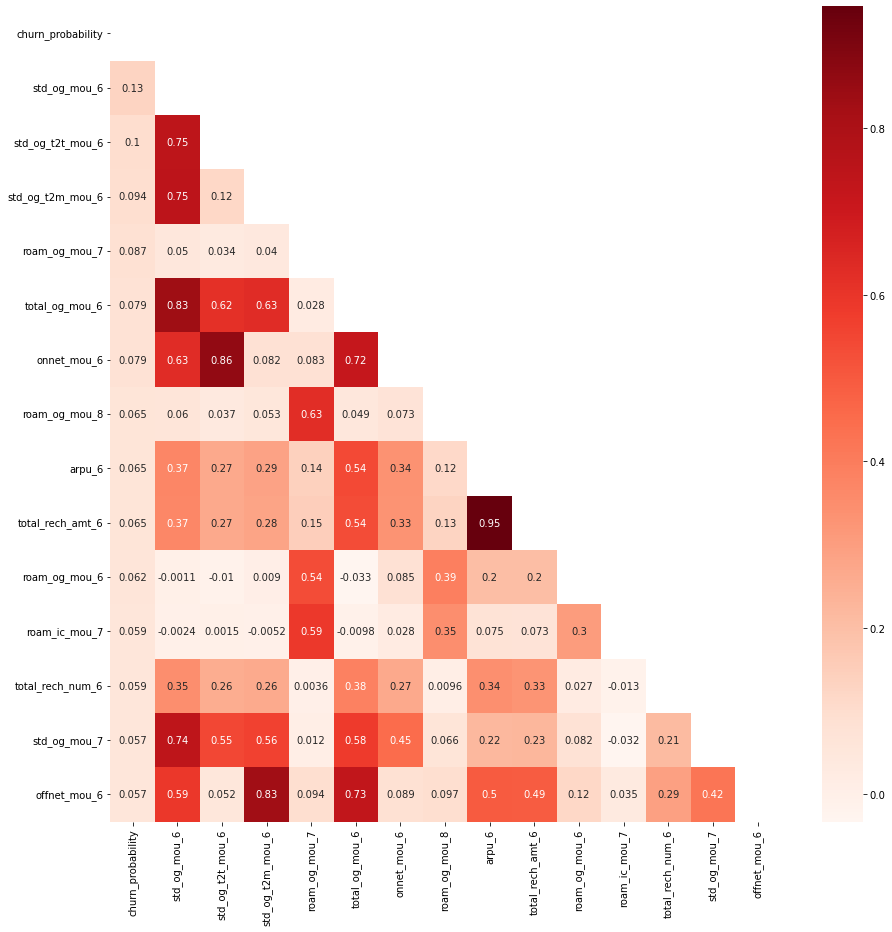

In [43]:
k = 15 
plt.figure(figsize=(15,15))
columns = train_df.corr().nlargest(k, 'churn_probability')['churn_probability'].index
matrix = np.triu(columns)
cm = np.corrcoef(train_df[columns].values.T)
hm = sns.heatmap(cm, cmap="Reds", cbar=True, annot=True, xticklabels=columns.values, yticklabels=columns.values, mask=matrix)
plt.show()

Looking at the graph there are features which are highly related to each other but as we will use Tree models and these models are immune to Multicollinearity and hence we will not remove them now.

#### Lets check other features with respect to churn probability

In [44]:
columns

Index(['churn_probability', 'std_og_mou_6', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_6', 'roam_og_mou_7', 'total_og_mou_6', 'onnet_mou_6',
       'roam_og_mou_8', 'arpu_6', 'total_rech_amt_6', 'roam_og_mou_6',
       'roam_ic_mou_7', 'total_rech_num_6', 'std_og_mou_7', 'offnet_mou_6'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

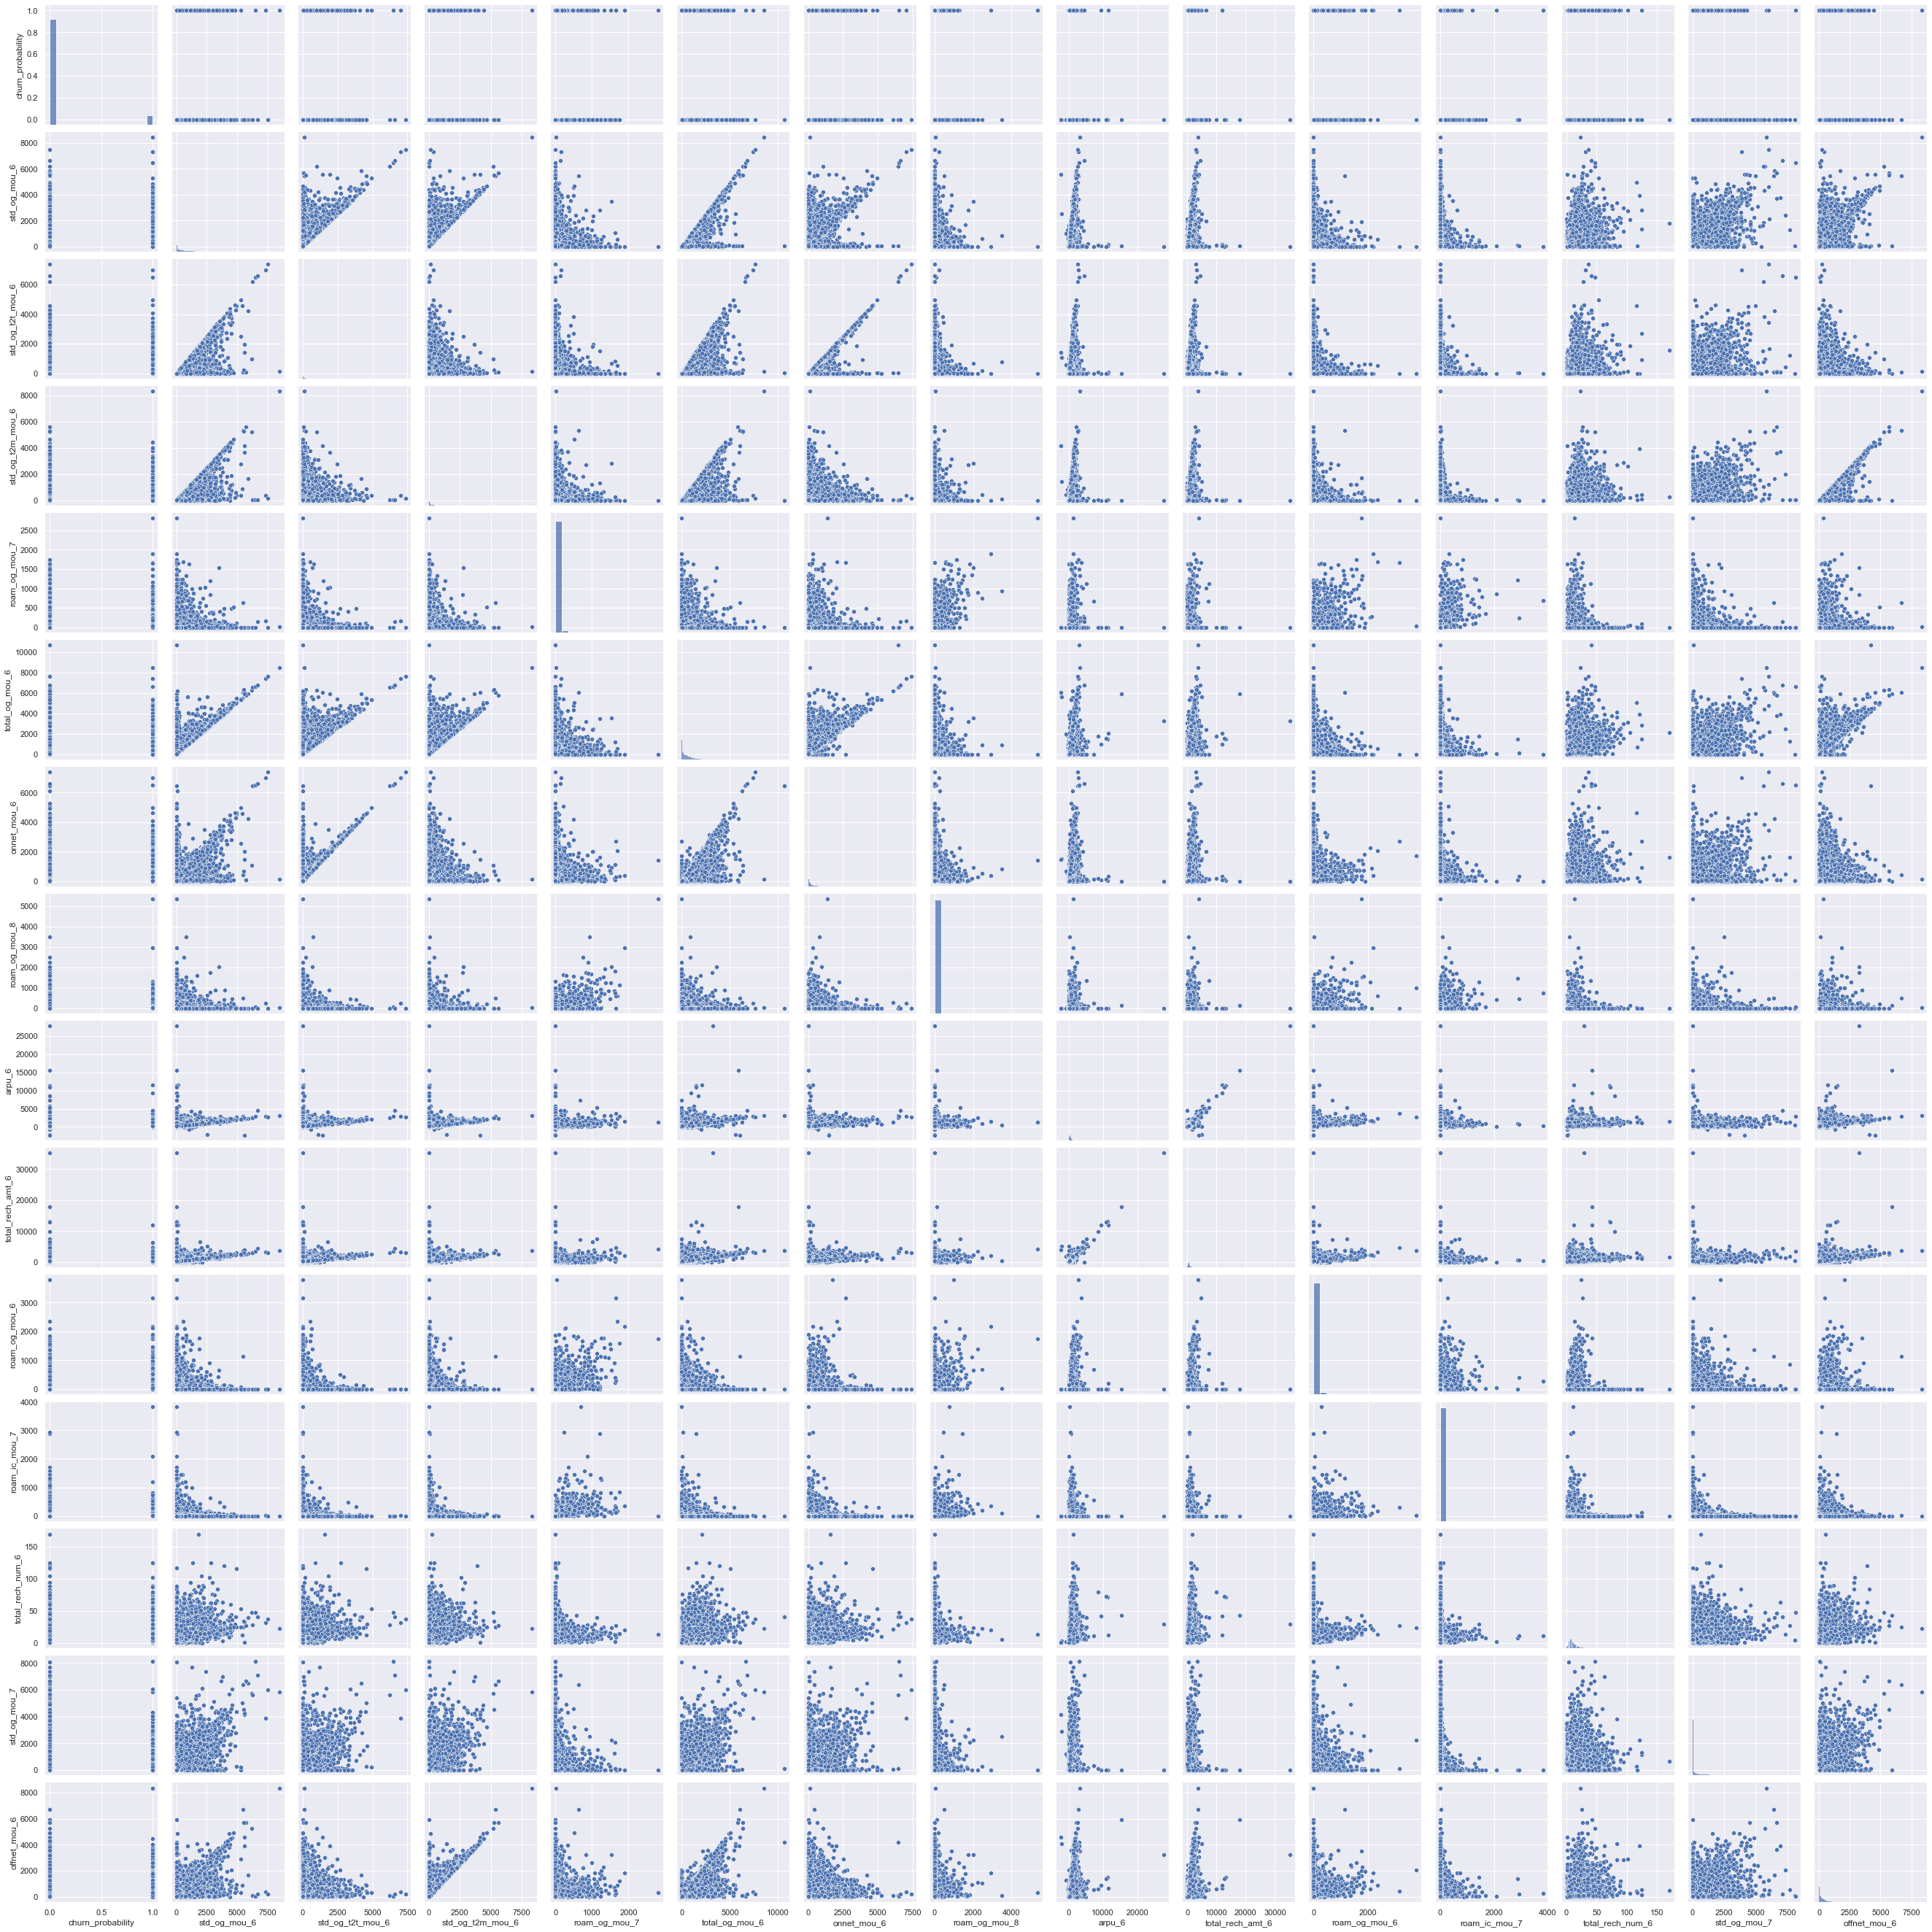

In [45]:
sns.set()
plt.figure(figsize=(25,25))
sns.pairplot(train_df[columns])
plt.show()

#### Lets focus on Outliers now and treat them

Function to remove outliers

In [46]:
def rm_outliers_fn(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.99)
        iqr = q3-q1
        lower_value  = q1 - (1.5 * iqr)
        higer_value = q3 + (1.5 * iqr)
        df = df[(df[feature] <= higer_value) & (df[feature] >= lower_value)]
    return df

In [47]:
train_df_wo_outlier = rm_outliers_fn(train_df, train_df.columns)
test_df_wo_outlier = rm_outliers_fn(test_df, test_df.columns)

In [48]:
train_df.shape

(21013, 134)

In [49]:
test_df.shape

(30000, 133)

In [50]:
train_df_wo_outlier.shape

(18805, 134)

In [51]:
test_df_wo_outlier.shape

(26190, 133)

#### Even though there are outliers but in this assignmnet we are looking for higest paying customers only.
#### So better we decided not to remove outliers.
#### Let's check for Data imbalance here

In [52]:
churn_data_rows = train_df['churn_probability'].sum()

In [53]:
churn_data_rows/len(train_df) * 100

8.275829248560415

#### We can see that there is a data imbalance. We have only about 8.28% of data as Churn and 91.72% as not churn.
#### So we need to apply data imbalance technique. We will use SMOTE.(Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.)
#### Dividing the data from train_df to train the model

In [54]:
y = train_df['churn_probability']
X = train_df.drop(['churn_probability'], axis=1)

train_df.drop('churn_probability', axis=1, inplace=True)

#### Splitting the data into test and train

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Taking a backup of variables to use later

In [56]:
#X_train_ori, X_test_ori, y_train_ori, y_test_ori = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

#### Rescaling the variables

In [57]:
scaler = MinMaxScaler()
train_numerical_columns = train_df.columns.to_list()
X_train[train_numerical_columns] = scaler.fit_transform(X_train[train_numerical_columns])
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
6968   0.127277  0.274576  0.081830     0.004624     0.004018     0.002985   
42203  0.156166  0.094305  0.083632     0.066057     0.041462     0.074009   
18406  0.151447  0.122733  0.087708     0.015153     0.016084     0.008306   
21455  0.171177  0.128305  0.077781     0.009636     0.010909     0.006579   
66143  0.138174  0.087866  0.074838     0.000000     0.006171     0.001633   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
6968       0.011537      0.040985      0.006554       0.000000  ...   
42203      0.065428      0.053213      0.049054       0.000000  ...   
18406      0.056327      0.259820      0.136117       0.005055  ...   
21455      0.081607      0.121132      0.038009       0.005166  ...   
66143      0.000000      0.033354      0.020053       0.000000  ...   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
6968            0.0           0.0           0.0     0.000000     0.000000   
42203           0.0           0.0           0.0     0.000000     0.000000   
18406           0.0           0.0           0.0     0.000000     0.000000   
21455           0.0           0.0           0.0     0.000000     0.030303   
66143           0.0           0.0           0.0     0.034483     0.000000   

       sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
6968       0.00000  0.337600    0.000000    0.002051    0.000000  
42203      0.00000  0.009660    0.000000    0.000000    0.000000  
18406      0.00000  0.702487    0.000000    0.000000    0.000000  
21455      0.02439  0.542381    0.029661    0.043865    0.039021  
66143      0.00000  0.055301    0.098218    0.000000    0.000000  

[5 rows x 133 columns]

In [58]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [59]:
X_resampled.shape

(27020, 133)

In [60]:
sum(y_resampled)/len(y_resampled) * 100

50.0

In [61]:
test_df.shape

(30000, 133)

Now there is no data imbalance in the dataset. 

Lets scale the data for test data

In [62]:
test_numerical_columns = test_df.columns.to_list()
test_df[test_numerical_columns] = scaler.transform(test_df[test_numerical_columns])
test_df.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.132455  0.074824  0.049909     0.004308     0.002480     0.002149   
1  0.150615  0.099685  0.064554     0.010236     0.005052     0.001845   
2  0.145864  0.095230  0.083592     0.001022     0.000963     0.000781   
3  0.129731  0.080680  0.047931     0.000720     0.000265     0.000000   
4  0.144568  0.093651  0.067145     0.061129     0.074656     0.065164   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  monthly_3g_6  \
0      0.007194      0.004771      0.002487       0.000000  ...           0.0   
1      0.056723      0.092260      0.028195       0.000000  ...           0.0   
2      0.002031      0.006797      0.003215       0.008728  ...           0.0   
3      0.004788      0.030417      0.001714       0.000000  ...           0.0   
4      0.007287      0.003537      0.005294       0.000000  ...           0.0   

   monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
0           0.0           0.0          0.0          0.0          0.0   
1           0.0           0.0          0.0          0.0          0.0   
2           0.0           0.0          0.0          0.0          0.0   
3           0.0           0.0          0.0          0.0          0.0   
4           0.0           0.0          0.0          0.0          0.0   

        aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0  0.365129    0.000000    0.000000      0.0000  
1  0.568220    0.000000    0.000000      0.0000  
2  0.023424    0.040694    0.082745      0.0319  
3  0.256943    0.000000    0.000000      0.0000  
4  0.068099    0.000000    0.000000      0.0000  

[5 rows x 133 columns]

### Modelling

We will do modelling using below model.

- Logistic Regression using RFE
- Logistic Regression + PCA
- Ridge Model
- Lasso Model
- Tree models - Random Forest
- Tree models - XGBoost

#### Logistic Regression using RFE

For RFE

In [63]:
logml = sm.GLM(y_resampled, (sm.add_constant(X_resampled)), family=sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26889
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8756.6
Date:                Wed, 09 Nov 2022   Deviance:                       17513.
Time:                        22:38:08   Pearson chi2:                 9.05e+04
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.3852      0.676     -5.005      0.000      -4.711      -2.059
arpu_6                 4.4309      3.779      1.173      0.241      -2.976      11.837
arpu_7                19.3725      4.380      4.422      0.000      10.787      27.958
arpu_8                43.8706      5.054      8.680      0.000      33.964      53.777
onnet_mou_6         -109.6522     35.343     -3.103      0.002    -178.922     -40.382
onnet_mou_7          -45.7358     32.327     -1.415      0.157    -109.096      17.624
onnet_mou_8            5.1339     51.090      0.100      0.920     -95.000     105.268
offnet_mou_6        -113.8318     39.739     -2.864      0.004    -191.720     -35.944
offnet_mou_7         -46.1773     25.878     -1.784      0.074     -96.898       4.543
offnet_mou_8         -34.5523     65.200     -0.530      0.596    -162.341      93.237
roam_ic_mou_6          1.5442      1.101      1.403      0.161      -0.613       3.701
roam_ic_mou_7          1.8584      1.286      1.445      0.149      -0.663       4.380
roam_ic_mou_8         -2.0903      1.351     -1.547      0.122      -4.739       0.558
roam_og_mou_6         54.5874     18.065      3.022      0.003      19.181      89.994
roam_og_mou_7         21.7021     10.930      1.985      0.047       0.279      43.125
roam_og_mou_8         11.4020     25.100      0.454      0.650     -37.794      60.598
loc_og_t2t_mou_6   -4.016e+04   2.51e+04     -1.597      0.110   -8.94e+04    9132.230
loc_og_t2t_mou_7    -372.1890   2.84e+04     -0.013      0.990    -5.6e+04    5.52e+04
loc_og_t2t_mou_8    1.981e+05   4.37e+04      4.537      0.000    1.13e+05    2.84e+05
loc_og_t2m_mou_6   -2.933e+04   1.84e+04     -1.597      0.110   -6.53e+04    6661.439
loc_og_t2m_mou_7    -229.2126   1.75e+04     -0.013      0.990   -3.45e+04     3.4e+04
loc_og_t2m_mou_8    9.141e+04   2.01e+04      4.538      0.000    5.19e+04    1.31e+05
loc_og_t2f_mou_6   -3862.2326   2415.091     -1.599      0.110   -8595.725     871.259
loc_og_t2f_mou_7     -38.0967   3124.845     -0.012      0.990   -6162.680    6086.487
loc_og_t2f_mou_8    1.084e+04   2388.635      4.539      0.000    6159.442    1.55e+04
loc_og_t2c_mou_6      -7.8268      1.491     -5.248      0.000     -10.750      -4.904
loc_og_t2c_mou_7      -0.1431      2.598     -0.055      0.956      -5.234       4.948
loc_og_t2c_mou_8       5.4771      1.584      3.458      0.001       2.372       8.582
loc_og_mou_6        4.167e+04   4.73e+04      0.882      0.378    -5.1e+04    1.34e+05
loc_og_mou_7       -1.751e+04   3.47e+04     -0.505      0.614   -8.55e+04    5.05e+04
loc_og_mou_8       -3.053e+05   5.34e+04     -5.717      0.000    -4.1e+05   -2.01e+05
std_og_t2t_mou_6   -9.418e+04   3.47e+04     -2.717      0.007   -1.62e+05   -2.62e+04
std_og_t2t_mou_7   -6.102e+04   3.98e+

Lower the p-value higher the significance

In [64]:
logreg = LogisticRegression()

Running RFE with 70 variables.

In [65]:
rfe = RFE(logreg, n_features_to_select=70)
rfe = rfe.fit(X_resampled, y_resampled)

In [66]:
list(zip(X_resampled.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 45),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 2),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', False, 33),
 ('roam_ic_mou_8', False, 63),
 ('roam_og_mou_6', False, 20),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 48),
 ('loc_og_t2t_mou_7', False, 46),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 58),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 11),
 ('loc_og_t2c_mou_8', False, 23),
 ('loc_og_mou_6', False, 55),
 ('loc_og_mou_7', False, 31),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 37),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 51),
 ('s

In [67]:
col = X_resampled.columns[rfe.support_]

In [68]:
X_resampled_sm = sm.add_constant(X_resampled[col])
logm2 = sm.GLM(y_resampled, X_resampled_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                27020
Model:                            GLM   Df Residuals:                    26950
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8985.8
Date:                Wed, 09 Nov 2022   Deviance:                       17972.
Time:                        22:39:03   Pearson chi2:                 1.26e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.2117      0.641     -5.012      0.000      -4.468      -1.956
arpu_6                 5.2279      3.450      1.515      0.130      -1.534      11.990
arpu_7                18.5520      3.981      4.660      0.000      10.750      26.355
arpu_8                39.6536      4.799      8.262      0.000      30.247      49.060
onnet_mou_6            1.6597      0.584      2.842      0.004       0.515       2.804
onnet_mou_7          -23.4951     10.282     -2.285      0.022     -43.648      -3.342
offnet_mou_6           1.6803      0.713      2.356      0.018       0.283       3.078
offnet_mou_7         -32.3298      8.714     -3.710      0.000     -49.409     -15.251
roam_ic_mou_6          1.6432      0.817      2.010      0.044       0.041       3.245
roam_og_mou_7         15.9069      3.598      4.421      0.000       8.855      22.959
roam_og_mou_8          4.7698      1.447      3.295      0.001       1.933       7.607
loc_og_t2t_mou_8    3.453e+04   3.77e+04      0.915      0.360   -3.94e+04    1.08e+05
loc_og_t2m_mou_6      -2.5384      0.943     -2.693      0.007      -4.386      -0.691
loc_og_t2m_mou_7       3.3445      3.419      0.978      0.328      -3.358      10.047
loc_og_t2m_mou_8    1.594e+04   1.74e+04      0.915      0.360   -1.82e+04    5.01e+04
loc_og_t2f_mou_6      -2.7585      1.638     -1.684      0.092      -5.969       0.452
loc_og_t2f_mou_8    1891.5722   2064.746      0.916      0.360   -2155.256    5938.401
loc_og_t2c_mou_6      -5.9416      1.226     -4.846      0.000      -8.345      -3.539
loc_og_mou_8       -3.538e+04   3.87e+04     -0.913      0.361   -1.11e+05    4.06e+04
std_og_t2t_mou_7     -15.8931      5.481     -2.900      0.004     -26.635      -5.151
std_og_t2m_mou_8      -5.3165      1.980     -2.685      0.007      -9.198      -1.435
std_og_t2f_mou_8      -7.4621      1.938     -3.850      0.000     -11.261      -3.663
std_og_mou_7          12.1413      5.844      2.078      0.038       0.687      23.595
std_og_mou_8         112.9156     39.717      2.843      0.004      35.071     190.760
spl_og_mou_7          -4.6847      2.123     -2.207      0.027      -8.846      -0.524
spl_og_mou_8           4.2888      2.597      1.651      0.099      -0.802       9.380
total_og_mou_7        31.3520     10.466      2.995      0.003      10.838      51.866
total_og_mou_8      -122.6325     40.107     -3.058      0.002    -201.242     -44.023
loc_ic_t2t_mou_6       9.8671      5.565      1.773      0.076      -1.041      20.775
loc_ic_t2t_mou_8   -8668.2790   8515.508     -1.018      0.309   -2.54e+04    8021.811
loc_ic_t2m_mou_6      11.1346      5.570      1.999      0.046       0.218      22.051
loc_ic_t2m_mou_8   -1.013e+04   9955.213     -1.017      0.309   -2.96e+04    9382.538
loc_ic_t2f_mou_8   -3188.3883   3129.5

Getting the top 25 features for Logistic model with RFE.

In [69]:
top_feature_lg_rfe = res.params.sort_values(ascending=False).head(25)

In [70]:
top_feature_lg_rfe = list(top_feature_lg_rfe.keys())

In [71]:
top_feature_lg_rfe

['loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_mou_8',
 'arpu_8',
 'total_og_mou_7',
 'arpu_7',
 'loc_ic_mou_7',
 'roam_og_mou_7',
 'std_og_mou_7',
 'loc_ic_t2m_mou_6',
 'max_rech_amt_8',
 'loc_ic_t2t_mou_6',
 'std_ic_t2t_mou_6',
 'arpu_6',
 'roam_og_mou_8',
 'max_rech_data_6',
 'spl_og_mou_8',
 'total_rech_num_7',
 'total_rech_data_6',
 'loc_og_t2m_mou_7',
 'monthly_3g_6',
 'offnet_mou_6',
 'onnet_mou_6']

#### Making predictions on the test set

In [72]:
X_test = X_test[col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 5662 to 36425
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              6304 non-null   float64
 1   arpu_7              6304 non-null   float64
 2   arpu_8              6304 non-null   float64
 3   onnet_mou_6         6304 non-null   float64
 4   onnet_mou_7         6304 non-null   float64
 5   offnet_mou_6        6304 non-null   float64
 6   offnet_mou_7        6304 non-null   float64
 7   roam_ic_mou_6       6304 non-null   float64
 8   roam_og_mou_7       6304 non-null   float64
 9   roam_og_mou_8       6304 non-null   float64
 10  loc_og_t2t_mou_8    6304 non-null   float64
 11  loc_og_t2m_mou_6    6304 non-null   float64
 12  loc_og_t2m_mou_7    6304 non-null   float64
 13  loc_og_t2m_mou_8    6304 non-null   float64
 14  loc_og_t2f_mou_6    6304 non-null   float64
 15  loc_og_t2f_mou_8    6304 non-null   float64
 16  lo

In [73]:
X_test_sm = sm.add_constant(X_test)

In [74]:
y_test_pred = res.predict(X_test_sm)

In [75]:
y_test_pred[:10]

5662     0.0
37574    0.0
58341    0.0
23282    0.0
30561    0.0
45844    0.0
30159    0.0
62778    0.0
45559    0.0
35274    0.0
dtype: float64

In [76]:
X_test_sm.head()

const    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
5662     1.0   554.740   782.352   673.692        36.86        38.63   
37574    1.0  1563.157  1579.675  1256.565      2761.74      3158.18   
58341    1.0   594.217   796.737   996.393       785.66      1200.53   
23282    1.0   352.160   197.245   365.564       192.04       179.88   
30561    1.0   332.040   275.976   267.033       116.49        96.89   

       offnet_mou_6  offnet_mou_7  roam_ic_mou_6  roam_og_mou_7  ...  \
5662         649.01        845.83            0.0           0.00  ...   
37574       1358.03       1144.44            0.0           0.00  ...   
58341        149.53        186.48            0.0           0.00  ...   
23282        508.53        116.58            0.0          34.96  ...   
30561        152.34        178.24            0.0           0.00  ...   

       monthly_2g_7  monthly_2g_8  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
5662              0             0            0             0             0   
37574             0             0            0             0             0   
58341             0             0            0             0             0   
23282             0             0            3             0             0   
30561             0             0            0             0             0   

       monthly_3g_8  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  
5662              0            0  1360        0.00         0.0  
37574             0            0   834        0.00         0.0  
58341             0            0   594        0.00         0.0  
23282             0            0  1164        0.00         0.0  
30561             0            0   635       31.05       337.7  

[5 rows x 71 columns]

In [77]:
X_resampled_sm.shape

(27020, 71)

In [78]:
y_pred_train = res.predict(X_resampled_sm)

In [79]:
y_pred_train.head()

0    0.999267
1    0.087501
2    0.114269
3    0.035352
4    0.004516
dtype: float64

In [80]:
y_pred_train.shape

(27020,)

In [81]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
27015    1
27016    1
27017    1
27018    1
27019    1
Name: churn_probability, Length: 27020, dtype: int64

In [82]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_train})

In [83]:
y_pred_train_final.head()

Churn_Prob
0    0.999267
1    0.087501
2    0.114269
3    0.035352
4    0.004516

In [84]:
y_pred_train_final['Churn_Prob_2'] =  y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

#### Confusion matrix for Precision and Recall and Accuracy of the model

In [85]:
confusion = metrics.confusion_matrix(y_resampled, y_pred_train_final.Churn_Prob_2)
confusion

array([[11723,  1787],
       [ 1614, 11896]], dtype=int64)

"model_dict" holds different metrics for all models on test data so that we can compare them at one place. 

In [86]:
model_dict = {}

In [87]:
def stats_params(y_actual, y_pred, y_proba, model):
    confusion = metrics.confusion_matrix(y_actual, y_pred)
    print('confusion matrix: ')
    print(confusion)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    print('Accuracy: ', accuracy)
    precision = TP / (TP+FP)
    print('Precision: ', precision)
    recall = TP / (TP+FN)
    print('Recall: ', recall)
    f1_score = 2*precision*recall/(precision+recall)
    print('F1_score: ', f1_score)
    if 'train' not in model:
        model_dict[model] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }
    return model_dict

In [88]:
stats_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_rfe_train')

confusion matrix: 
[[11723  1787]
 [ 1614 11896]]
Accuracy:  0.8741302738712066
Precision:  0.8693999853833224
Recall:  0.8805329385640267
F1_score:  0.8749310484315818


{}

Let's check for test data set

In [89]:
test_df.shape

(30000, 133)

In [90]:
test_sol_df.shape

(30000, 2)

In [91]:
test_df_ori = test_df

In [92]:
test_df = test_df[col]
test_df = sm.add_constant(test_df)

In [93]:
y_pred_test = res.predict(test_df)

In [94]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_test})

In [95]:
y_pred_test_final.head()

Churn_Prob
0    0.112038
1    0.278619
2    0.765463
3    0.105516
4    0.288337

In [96]:
y_pred_test_final['Churn_Prob_2'] =  y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [97]:
model_dict = stats_params(test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_rfe_test')

confusion matrix: 
[[21687  5254]
 [  437  2622]]
Accuracy:  0.8103
Precision:  0.3329101066531234
Recall:  0.8571428571428571
F1_score:  0.4795610425240055


In [98]:
model_dict

{'Logistic_rfe_test': {'Accuracy': 0.8103,
  'Precision': 0.3329101066531234,
  'Recall': 0.8571428571428571,
  'F1 Score': 0.4795610425240055}}

#### Model 2: Logistic Regression + PCA

#### PCA on the data
- While computing the principal components, we must not include the entire dataset.
- So we'll calculate the PCs using the train data, and apply them later on the test data.

In [99]:
y_resampled.shape

(27020,)

In [100]:
X_resampled.shape

(27020, 133)

In [101]:
pca = PCA(random_state=42)

In [102]:
pca.fit(X_resampled)

PCA(random_state=42)

<b>In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.</b>

In [103]:
pca.components_

array([[ 1.52429717e-02,  1.16251337e-02, -6.63666583e-03, ...,
        -2.21965052e-02, -3.54392395e-02, -4.03689907e-02],
       [ 4.98173867e-02,  5.48697086e-02,  3.74554184e-02, ...,
        -2.06921812e-02, -4.04412458e-02, -5.45674928e-02],
       [ 4.81788576e-02,  7.32213787e-02,  6.77600884e-02, ...,
         8.11206358e-02,  1.30692910e-01,  1.40598564e-01],
       ...,
       [-5.56630857e-16,  3.86369576e-16,  1.62386541e-16, ...,
        -4.69920197e-17,  1.64522323e-17, -2.65538137e-17],
       [ 0.00000000e+00,  1.52451145e-16,  5.40578508e-17, ...,
        -1.88769711e-17, -4.14315441e-17,  1.58569414e-17],
       [ 0.00000000e+00, -1.70959044e-16,  1.67741025e-16, ...,
        -8.02511126e-17,  1.29441884e-17, -2.55628097e-17]])

In [104]:
pca.explained_variance_ratio_

array([1.93635658e-01, 1.57947907e-01, 7.53555345e-02, 6.07047832e-02,
       5.31640489e-02, 4.91045298e-02, 4.54579100e-02, 3.16271753e-02,
       2.08348167e-02, 1.99301611e-02, 1.93593547e-02, 1.74929605e-02,
       1.54705763e-02, 1.26480490e-02, 1.22728731e-02, 1.19614543e-02,
       1.09756615e-02, 1.04103600e-02, 1.01291427e-02, 9.46751637e-03,
       8.84658488e-03, 8.02950541e-03, 7.40665055e-03, 7.02530851e-03,
       6.73229330e-03, 6.66095434e-03, 6.30029507e-03, 5.72186445e-03,
       5.32337109e-03, 5.20324509e-03, 4.88221704e-03, 4.71001375e-03,
       4.15245402e-03, 3.76047954e-03, 3.45737346e-03, 3.24792071e-03,
       3.17033242e-03, 2.98505769e-03, 2.94004461e-03, 2.83552865e-03,
       2.79100013e-03, 2.62225327e-03, 2.61340480e-03, 2.55095231e-03,
       2.38047168e-03, 2.18479651e-03, 2.13715958e-03, 2.09827494e-03,
       1.98276946e-03, 1.85380946e-03, 1.83229959e-03, 1.75389902e-03,
       1.70106363e-03, 1.62133378e-03, 1.42690091e-03, 1.40816513e-03,
      

In [105]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

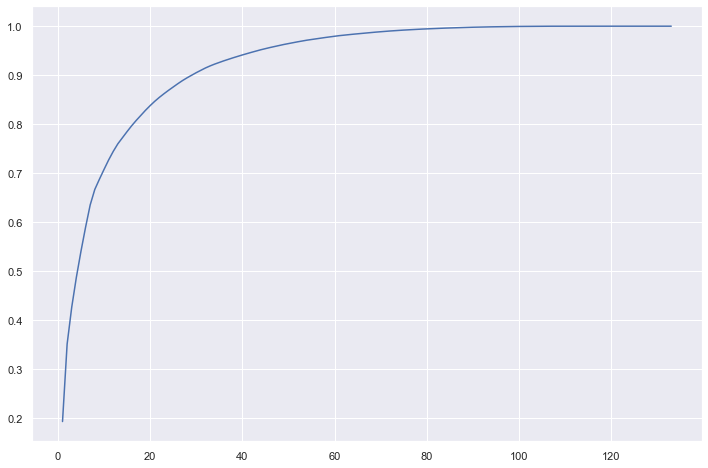

In [106]:
fig = plt.figure(figsize=[12,8])
plt.plot(range(1,len(var_cumu)+1), var_cumu)

#### Looking at the scree plot with 50 PCs we have more than 95% of variance explained.

In [107]:
pca_final = IncrementalPCA(n_components=50)

In [108]:
df_train_pca = pca_final.fit_transform(X_resampled)

In [109]:
df_train_pca.shape

(27020, 50)

In [110]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [111]:
corrmat.shape

(50, 50)

In [112]:
corrmat

array([[ 1.00000000e+00, -2.01660019e-07, -4.85573370e-08, ...,
         4.03285241e-05, -5.32655130e-05,  3.43511032e-06],
       [-2.01660019e-07,  1.00000000e+00, -1.14142155e-07, ...,
         2.53050053e-05, -5.35288939e-05, -3.53097444e-05],
       [-4.85573370e-08, -1.14142155e-07,  1.00000000e+00, ...,
         3.93871982e-05,  8.70900441e-05, -1.31954475e-04],
       ...,
       [ 4.03285241e-05,  2.53050053e-05,  3.93871982e-05, ...,
         1.00000000e+00, -8.09449595e-02, -4.13566990e-02],
       [-5.32655130e-05, -5.35288939e-05,  8.70900441e-05, ...,
        -8.09449595e-02,  1.00000000e+00,  3.78540063e-02],
       [ 3.43511032e-06, -3.53097444e-05, -1.31954475e-04, ...,
        -4.13566990e-02,  3.78540063e-02,  1.00000000e+00]])

Applying the transformation on the test set

In [113]:
test_df_ori.shape

(30000, 133)

In [114]:
df_test_pca = pca_final.transform(test_df_ori)
df_test_pca.shape

(30000, 50)

#### Applying logistic regression on the data and our Principal components

In [115]:
learner_pca = LogisticRegression()

In [116]:
model_pca = learner_pca.fit(df_train_pca, y_resampled)

In [117]:
y_pred_proba = model_pca.predict_proba(df_train_pca)[::,1]

In [118]:
y_pred_proba

array([0.95124189, 0.07975591, 0.08506557, ..., 0.72176212, 0.62395064,
       0.9324554 ])

In [119]:
y_pred_train_final = pd.DataFrame({'Churn_Prob': y_pred_proba})

In [120]:
y_pred_train_final['Churn_Prob_2'] = y_pred_train_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [121]:
stats_params(y_resampled, y_pred_train_final.Churn_Prob_2, y_pred_train_final.Churn_Prob, 'Logistic_pca_train')

confusion matrix: 
[[10969  2541]
 [ 1776 11734]]
Accuracy:  0.8402294596595115
Precision:  0.8219964973730298
Recall:  0.8685418208734271
F1_score:  0.8446283966168797


{'Logistic_rfe_test': {'Accuracy': 0.8103,
  'Precision': 0.3329101066531234,
  'Recall': 0.8571428571428571,
  'F1 Score': 0.4795610425240055}}

In [122]:
model_dict

{'Logistic_rfe_test': {'Accuracy': 0.8103,
  'Precision': 0.3329101066531234,
  'Recall': 0.8571428571428571,
  'F1 Score': 0.4795610425240055}}

#### Making predictions on the test set

In [123]:
y_pred_proba = model_pca.predict_proba(df_test_pca)[::,1]

In [124]:
y_pred_proba

array([0.17769374, 0.2622256 , 0.69875576, ..., 0.62427645, 0.85874544,
       0.03113132])

In [125]:
y_pred_test_final = pd.DataFrame({'Churn_Prob': y_pred_proba})

In [126]:
y_pred_test_final['Churn_Prob_2'] = y_pred_test_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [127]:
model_dict = stats_params(test_sol_df.churn_probability, y_pred_test_final.Churn_Prob_2, y_pred_test_final.Churn_Prob, 'Logistic_pca_test')


confusion matrix: 
[[17888  9053]
 [  367  2692]]
Accuracy:  0.686
Precision:  0.2292039165602384
Recall:  0.8800261523373651
F1_score:  0.3636854904079978


In [128]:
model_dict

{'Logistic_rfe_test': {'Accuracy': 0.8103,
  'Precision': 0.3329101066531234,
  'Recall': 0.8571428571428571,
  'F1 Score': 0.4795610425240055},
 'Logistic_pca_test': {'Accuracy': 0.686,
  'Precision': 0.2292039165602384,
  'Recall': 0.8800261523373651,
  'F1 Score': 0.3636854904079978}}

Recall coming close to 88% but Accuracy went down close to 69%.The reason behind is Precision has gone down to 23%.

#### Ridge Regression

In [129]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Getting the best hyperparameter alpha

In [130]:
print(model_cv.best_params_)

{'alpha': 0.001}


Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

In [131]:
alpha = 0.001

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_resampled, y_resampled) 

Ridge(alpha=0.001)

In [132]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.108009      0.015426         0.007254        0.001130       0.0001   
1       0.096953      0.009350         0.006647        0.000918       0.0010   
2       0.109448      0.012262         0.006836        0.000899       0.0100   
3       0.106773      0.012038         0.006918        0.001498       0.0500   
4       0.102118      0.009480         0.007199        0.001329       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.321020          -0.324234          -0.320996   
1   {'alpha': 0.001}          -0.321114          -0.324381          -0.321047   
2    {'alpha': 0.01}          -0.321977          -0.325374          -0.321668   
3    {'alpha': 0.05}          -0.325184          -0.328508          -0.324913   
4     {'alpha': 0.1}          -0.328392          -0.331525          -0.328257   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.312419  ...           -0.283889           -0.285328   
1          -0.312440  ...           -0.283889           -0.285332   
2          -0.313072  ...           -0.283905           -0.285369   
3          -0.315873  ...           -0.284088           -0.285559   
4          -0.318814  ...           -0.284730           -0.286233   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.284975           -0.288425           -0.285828   
1           -0.284969           -0.288435           -0.285850   
2           -0.284971           -0.288566           -0.286135   
3           -0.285171           -0.289386           -0.287644   
4           -0.285844           -0.290857           -0.289873   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.286225           -0.285888           -0.286082   
1           -0.286247           -0.285912           -0.286105   
2           -0.286531           -0.286217           -0.286407   
3           -0.287980           -0.287769           -0.287955   
4           -0.290117           -0.289965           -0.290137   

   mean_train_score  std_train_score  
0         -0.285437         0.001350  
1         -0.285446         0.001357  
2         -0.285583         0.001439  
3         -0.286359         0.001914  
4         -0.287714         0.002544  

[5 rows x 31 columns]

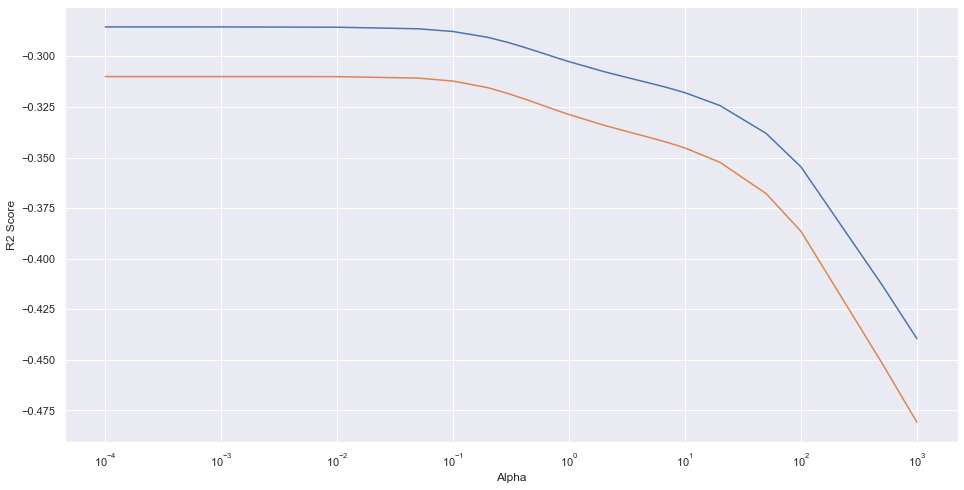

In [133]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

As the curves are not converging we will check Lasso model.

#### Lasso

In [134]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Getting the best hyperparameter alpha

In [135]:
print(model_cv.best_params_)

{'alpha': 0.0001}


Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

In [136]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_resampled, y_resampled) 

Lasso(alpha=0.0001)

In [137]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       2.449100      0.491397         0.006287        0.001829       0.0001   
1       0.213936      0.090792         0.006131        0.002974       0.0010   
2       0.087893      0.009583         0.003177        0.003834       0.0100   
3       0.077884      0.007158         0.004850        0.002652       0.0500   
4       0.081940      0.007185         0.004279        0.003376       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.342594          -0.344878          -0.342741   
1   {'alpha': 0.001}          -0.379319          -0.382669          -0.377126   
2    {'alpha': 0.01}          -0.523066          -0.522223          -0.525240   
3    {'alpha': 0.05}          -0.538660          -0.538455          -0.539627   
4     {'alpha': 0.1}          -0.538660          -0.538455          -0.539627   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.333882  ...           -0.294136           -0.295735   
1          -0.370357  ...           -0.330463           -0.332222   
2          -0.521543  ...           -0.481132           -0.480757   
3          -0.538866  ...           -0.495597           -0.495682   
4          -0.538866  ...           -0.495597           -0.495682   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.295113           -0.301477           -0.301455   
1           -0.331004           -0.341316           -0.344219   
2           -0.481458           -0.485174           -0.479964   
3           -0.495643           -0.499784           -0.493827   
4           -0.495643           -0.499784           -0.493827   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.301621           -0.301473           -0.301575   
1           -0.343859           -0.344130           -0.343708   
2           -0.480140           -0.479444           -0.480716   
3           -0.493827           -0.493827           -0.493827   
4           -0.493827           -0.493827           -0.493827   

   mean_train_score  std_train_score  
0         -0.298092         0.003466  
1         -0.337126         0.006397  
2         -0.481015         0.001492  
3         -0.495345         0.001716  
4         -0.495345         0.001716  

[5 rows x 31 columns]

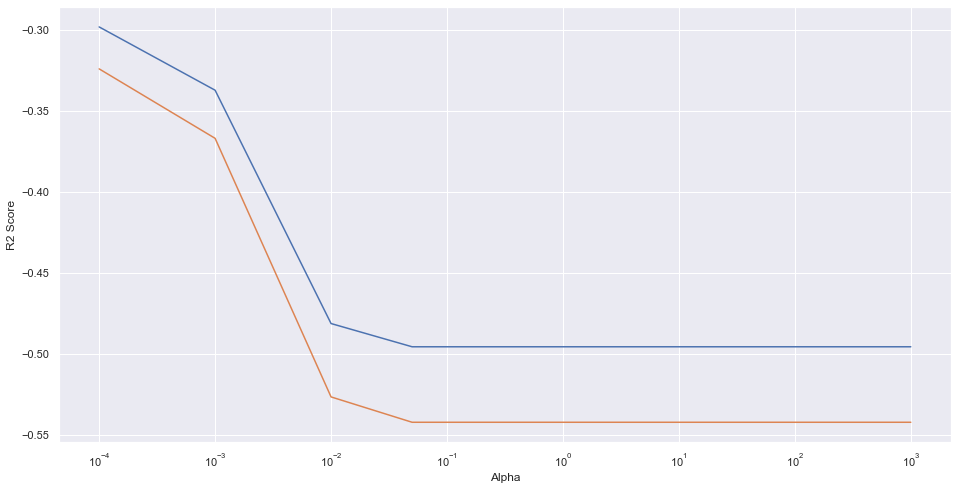

In [138]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

As the curves are not converging, Lasso model will not work well.

#### Tree models - Random Forest

In [139]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [140]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [141]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [142]:
grid_search.fit(X_resampled, y_resampled)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [143]:
grid_search.best_score_

0.9517764618800888

In [144]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [145]:
rf_best.feature_importances_

array([3.06003866e-03, 3.86545394e-03, 2.69714616e-02, 4.14119989e-03,
       4.23449539e-03, 7.76834755e-03, 3.61756820e-03, 4.13883728e-03,
       5.95332905e-03, 1.89765620e-03, 4.21308922e-03, 5.41665336e-02,
       2.50219395e-03, 6.27899353e-03, 5.00062276e-02, 3.13598117e-03,
       2.95885655e-03, 1.21597877e-02, 2.45833422e-03, 4.85027534e-03,
       1.62982288e-02, 1.50408308e-03, 1.96644784e-03, 3.81351673e-03,
       1.12714732e-03, 2.15665665e-03, 1.69674993e-03, 3.11368166e-03,
       4.08400565e-03, 2.15170438e-02, 3.49240902e-03, 4.31606866e-03,
       2.82925370e-03, 6.67311438e-03, 5.79577831e-03, 8.10327872e-03,
       8.78643210e-04, 4.29629023e-04, 5.59587088e-04, 5.84603969e-03,
       4.73557745e-03, 8.91163237e-03, 6.60089633e-04, 8.49632754e-04,
       9.69310444e-04, 2.97542273e-03, 4.35070967e-03, 3.44628142e-03,
       2.07834616e-03, 4.86938446e-06, 1.11073830e-05, 3.11566648e-03,
       3.87695857e-03, 1.99770628e-02, 2.60982732e-03, 2.83329773e-03,
      

In [146]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [147]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

Varname       Imp
80       total_ic_mou_8  0.079354
11        roam_ic_mou_8  0.054167
14        roam_og_mou_8  0.050006
65         loc_ic_mou_8  0.045614
59     loc_ic_t2m_mou_8  0.044086
104   total_rech_data_8  0.041607
101  last_day_rch_amt_8  0.039814
95     total_rech_amt_8  0.039045
98       max_rech_amt_8  0.038037
107     max_rech_data_8  0.034545

Applying Random Forest on Test Data

In [148]:
y_pred_rf = rf_best.predict(test_df_ori)

In [149]:
test_sol_df.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [150]:
confusion = metrics.confusion_matrix(test_sol_df.churn_probability, y_pred_rf)

In [151]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

confusion matrix: 
[[25264  1677]
 [  800  2259]]
Accuracy:  0.9174333333333333
Precision:  0.5739329268292683
Recall:  0.7384766263484799
F1_score:  0.6458899213724089


In [152]:
model_dict['RandomForest_test'] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }

In [153]:
model_dict

{'Logistic_rfe_test': {'Accuracy': 0.8103,
  'Precision': 0.3329101066531234,
  'Recall': 0.8571428571428571,
  'F1 Score': 0.4795610425240055},
 'Logistic_pca_test': {'Accuracy': 0.686,
  'Precision': 0.2292039165602384,
  'Recall': 0.8800261523373651,
  'F1 Score': 0.3636854904079978},
 'RandomForest_test': {'Accuracy': 0.9174333333333333,
  'Precision': 0.5739329268292683,
  'Recall': 0.7384766263484799,
  'F1 Score': 0.6458899213724089}}

#### XGBoost

In [154]:
xgb_cfl = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic')

In [155]:
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [156]:
xgb_cfl.fit(X_resampled, y_resampled)
# Get our predictions
xgb_predictions = xgb_cfl.predict(test_df_ori)

#### Value for Kaggle

In [157]:
xgb_predictions 

array([0, 0, 1, ..., 0, 0, 0])

In [158]:
xgb_predictions_prob = xgb_cfl.predict_proba(test_df_ori)
xgb_predictions_prob

array([[0.99086547, 0.00913452],
       [0.99765337, 0.00234663],
       [0.3955624 , 0.6044376 ],
       ...,
       [0.8809065 , 0.11909348],
       [0.9263043 , 0.07369571],
       [0.9982485 , 0.00175148]], dtype=float32)

In [159]:
xgb_predictions_prob.shape

(30000, 2)

In [160]:
xgb_predictions_prob.reshape(-1, )

array([0.99086547, 0.00913452, 0.99765337, ..., 0.07369571, 0.9982485 ,
       0.00175148], dtype=float32)

In [161]:
len(xgb_predictions)

30000

In [162]:
accuracy_score(test_sol_df.churn_probability, xgb_predictions)

0.9329666666666667

##### Accuracy of 93.2% with default values of XGBoost.

In [163]:
confusion = metrics.confusion_matrix(test_sol_df.churn_probability, xgb_predictions)

In [164]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

confusion matrix: 
[[26028   913]
 [ 1098  1961]]
Accuracy:  0.9329666666666667
Precision:  0.6823242867084203
Recall:  0.6410591696632887
F1_score:  0.6610483735041294


#### HPT - Random Search for XGBoost

In [165]:
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 10, 12]
        }

folds = 5
param_comb = 10
random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=folds, verbose=3, random_state=42)


In [166]:
random_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [167]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

 Best accuracy for 5-fold search with 10 parameter combinations:
0.9609178386380458

 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}


In [168]:
# Getting our predictions
xgb_predictions = random_search.predict(test_df_ori)

In [169]:
xgb_cfl.feature_importances_

array([0.00202077, 0.00262425, 0.00224568, 0.00238194, 0.00330363,
       0.007696  , 0.00170859, 0.00147482, 0.00181186, 0.00611809,
       0.00283205, 0.02083387, 0.005537  , 0.00867768, 0.07113761,
       0.00283301, 0.00590516, 0.00552324, 0.00209967, 0.00140028,
       0.0031703 , 0.00209213, 0.00191534, 0.00341207, 0.00238558,
       0.00607443, 0.00319375, 0.00224331, 0.00207014, 0.00473486,
       0.0043809 , 0.00334835, 0.0030738 , 0.00200163, 0.00398613,
       0.00908204, 0.00199388, 0.00191957, 0.00246737, 0.00223142,
       0.00955873, 0.0050242 , 0.00487036, 0.0057671 , 0.00758476,
       0.00258095, 0.00917735, 0.00400475, 0.0045013 , 0.        ,
       0.        , 0.00267187, 0.00178332, 0.01230533, 0.00242557,
       0.0019253 , 0.0022056 , 0.00156378, 0.00361515, 0.00293703,
       0.00723811, 0.00183344, 0.01533523, 0.00119586, 0.00229453,
       0.01305152, 0.00371608, 0.00792406, 0.00222844, 0.00468934,
       0.01476942, 0.00605352, 0.00374172, 0.0020978 , 0.00587

In [170]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [171]:
imp_df.sort_values(by="Imp", ascending=False).head(15)

Varname       Imp
80       total_ic_mou_8  0.079354
11        roam_ic_mou_8  0.054167
14        roam_og_mou_8  0.050006
65         loc_ic_mou_8  0.045614
59     loc_ic_t2m_mou_8  0.044086
104   total_rech_data_8  0.041607
101  last_day_rch_amt_8  0.039814
95     total_rech_amt_8  0.039045
98       max_rech_amt_8  0.038037
107     max_rech_data_8  0.034545
92     total_rech_num_8  0.028861
2                arpu_8  0.026971
29         loc_og_mou_8  0.021517
53       total_og_mou_8  0.019977
110  av_rech_amt_data_8  0.018250

In [172]:
xgb_predictions_prob = random_search.predict_proba(test_df_ori)
xgb_predictions_prob

array([[0.9925412 , 0.00745883],
       [0.99744195, 0.00255806],
       [0.17839128, 0.8216087 ],
       ...,
       [0.8419001 , 0.15809992],
       [0.98616844, 0.01383158],
       [0.9889919 , 0.01100809]], dtype=float32)

In [173]:
xgb_predictions_prob.shape

(30000, 2)

In [174]:
accuracy_score(test_sol_df.churn_probability, xgb_predictions)

0.9329

In [175]:
confusion = metrics.confusion_matrix(test_sol_df.churn_probability, xgb_predictions)

In [176]:
print('confusion matrix: ')
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
accuracy = (TN+TP)/(TN+TP+FN+FP)
print('Accuracy: ', accuracy)
precision = TP / (TP+FP)
print('Precision: ', precision)
recall = TP / (TP+FN)
print('Recall: ', recall)
f1_score = 2*precision*recall/(precision+recall)
print('F1_score: ', f1_score)

confusion matrix: 
[[25966   975]
 [ 1038  2021]]
Accuracy:  0.9329
Precision:  0.67456608811749
Recall:  0.6606734226871527
F1_score:  0.6675474814203138


In [177]:
model_dict['XGBoost_test'] = {
                           'Accuracy': accuracy, 
                           'Precision':precision, 
                           'Recall': recall, 
                           'F1 Score': f1_score, 
                          }

##### We can see both accuracy and recall are better for XGBoost model without any hyper paramter tuning.
##### Let's see the model_dict now to tell which model is performing best on the given test dataset.

In [178]:
model_dict

{'Logistic_rfe_test': {'Accuracy': 0.8103,
  'Precision': 0.3329101066531234,
  'Recall': 0.8571428571428571,
  'F1 Score': 0.4795610425240055},
 'Logistic_pca_test': {'Accuracy': 0.686,
  'Precision': 0.2292039165602384,
  'Recall': 0.8800261523373651,
  'F1 Score': 0.3636854904079978},
 'RandomForest_test': {'Accuracy': 0.9174333333333333,
  'Precision': 0.5739329268292683,
  'Recall': 0.7384766263484799,
  'F1 Score': 0.6458899213724089},
 'XGBoost_test': {'Accuracy': 0.9329,
  'Precision': 0.67456608811749,
  'Recall': 0.6606734226871527,
  'F1 Score': 0.6675474814203138}}

#### XGBoost is best here as it gives better Acccuracy. Also Precision and Recall are nearly the same.

#### Using XGBoost for Kaggle Submission

In [179]:
xgb_predictions

array([0, 0, 1, ..., 0, 0, 0])

In [180]:
test_sol_df.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [181]:
solution_csv = pd.DataFrame()

In [182]:
solution_csv['id'] = test_sol_df['id']

In [183]:
solution_csv['churn_probability'] = xgb_predictions

In [184]:
solution_csv.shape

(30000, 2)

In [185]:
solution_csv.head(5)

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [188]:
solution_csv.to_csv(r'C:\Users\U380268\Downloads\Personal\PG Diploma\Case Study Hackathon\telecom-churn-case-study-hackathon-c41\Submission.csv',index=False)

#### Top 15 features for XGBoost are

In [189]:
imp_df.sort_values(by="Imp", ascending=False).head(15)

Varname       Imp
80       total_ic_mou_8  0.079354
11        roam_ic_mou_8  0.054167
14        roam_og_mou_8  0.050006
65         loc_ic_mou_8  0.045614
59     loc_ic_t2m_mou_8  0.044086
104   total_rech_data_8  0.041607
101  last_day_rch_amt_8  0.039814
95     total_rech_amt_8  0.039045
98       max_rech_amt_8  0.038037
107     max_rech_data_8  0.034545
92     total_rech_num_8  0.028861
2                arpu_8  0.026971
29         loc_og_mou_8  0.021517
53       total_og_mou_8  0.019977
110  av_rech_amt_data_8  0.018250